# Домашняя работа. Урок 3. Классификация. Логистическая регрессия.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns


%matplotlib inline

In [3]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [4]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [6]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

## 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [7]:
def calc_logloss(y, y_pred):
    y_pred = y_pred.astype(np.float64) #преобразуем y_pred к типу float
    y_pred[y_pred==0] = 0.0001 #всем значениям 0 присваиваем значение 0,0001, чтобы функция была рабочей и в ln не попадал 0
    y_pred[y_pred==1] = 0.9999 #всем значениям 1 присваиваем значение 0,9999, чтобы функция была рабочей и в ln не попадал 0
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [8]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.16425203348601797

In [9]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0, 0.2])
calc_logloss(y1, y_pred1)

4.716741961645196

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [13]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W1 = W
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        #if i % (iterations / 10) == 0:
            #print(i, W1, err)
    print(f'Final eta {eta}, iterations {i}, W {W1}, err {err}')
    return err, W1, i

In [14]:
#подбор оптимальных eta и iterations
err_eta_iter_w_list = [10000,0,0,0]
for i in [100, 150, 200, 250, 300, 310, 320, 350, 400, 500]:
    for j in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
        if eval_model(X_st, y, iterations=i, eta=j)[0]<err_eta_iter_w_list[0]:
            err_eta_iter_w_list = [eval_model(X_st, y, iterations=i, eta=j)[0], j, eval_model(X_st, y, iterations=i, eta=j)[2], eval_model(X_st, y, iterations=i, eta=j)[1]]       

Final eta 0.001, iterations 99, W [ 0.46072513 -0.27653801  0.64396485  1.46889442], err 0.9469969250572376
Final eta 0.001, iterations 99, W [ 0.46072513 -0.27653801  0.64396485  1.46889442], err 0.9469969250572376
Final eta 0.001, iterations 99, W [ 0.46072513 -0.27653801  0.64396485  1.46889442], err 0.9469969250572376
Final eta 0.001, iterations 99, W [ 0.46072513 -0.27653801  0.64396485  1.46889442], err 0.9469969250572376
Final eta 0.01, iterations 99, W [ 0.30052426 -0.7012269   0.66327117  1.28844369], err 0.5202099204174199
Final eta 0.01, iterations 99, W [ 0.30052426 -0.7012269   0.66327117  1.28844369], err 0.5202099204174199
Final eta 0.01, iterations 99, W [ 0.30052426 -0.7012269   0.66327117  1.28844369], err 0.5202099204174199
Final eta 0.01, iterations 99, W [ 0.30052426 -0.7012269   0.66327117  1.28844369], err 0.5202099204174199
Final eta 0.1, iterations 99, W [-0.16766678 -0.75425021  0.95413376  1.46442203], err 0.47660345824649475
Final eta 0.1, iterations 99, W [

/tmp/ipykernel_206865/2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))



Final eta 10000, iterations 249, W [-59793.37210821  -7508.89816326 -13574.9533313   53340.06033928], err 9.000450030001259e-05
Final eta 10000, iterations 249, W [-59793.37210821  -7508.89816326 -13574.9533313   53340.06033928], err 9.000450030001259e-05
Final eta 0.001, iterations 299, W [ 0.40235336 -0.49509105  0.63498579  1.38177368], err 0.6474600652646159
Final eta 0.01, iterations 299, W [ 0.15143647 -0.7160177   0.7812503   1.29001551], err 0.5009718677659235
Final eta 0.1, iterations 299, W [-0.7882581  -0.86637805  0.95643186  1.99019315], err 0.4422921962931354
Final eta 1, iterations 299, W [-5.65658596 -1.03642183 -0.77175696  5.22032262], err 0.2983635572917686
Final eta 10, iterations 299, W [-53.2098757   -5.49721159 -14.24394916  44.01354415], err 0.08173134457901446
Final eta 100, iterations 299, W [-585.32191802  -76.68099122 -123.73932109  534.14461965], err 0.0005410793459875407
Final eta 1000, iterations 299, W [-6024.57318899  -824.36407759 -1678.27204833  5410

In [15]:
print(f' Оптимальные аргументы функции, при которых ошибка минимальна: eta {err_eta_iter_w_list[1]}, iterations {err_eta_iter_w_list[2]+1}')

 Оптимальные аргументы функции, при которых ошибка минимальна: eta 1000, iterations 320


In [16]:
W = eval_model(X_st, y, iterations=320, eta=1000)[1]

Final eta 1000, iterations 319, W [-6183.10836088  -775.86282181 -1511.70423529  5451.6218806 ], err 7.000350054340622e-05


/tmp/ipykernel_206865/2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


In [17]:
W

array([-6183.10836088,  -775.86282181, -1511.70423529,  5451.6218806 ])

## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [18]:
def calc_pred_proba(X, W):
    z = np.dot(X, W)
    y_pred_proba = 1 / (1 + np.exp(-z))
    return y_pred_proba

In [19]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [20]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [21]:
W

array([-6183.10836088,  -775.86282181, -1511.70423529,  5451.6218806 ])

In [22]:
z = np.dot(X_st, W)
z

array([  -26.49941977,  -650.01515969,  3869.86496411, -3441.70857698,
         911.69705256,  -185.91020784,  4655.71435455,  -782.38910432,
         129.37951521,  3090.4702892 ])

Отобразим линию, разделяющую на классы полученные с помощью весов W <w,x>. Так как у нас 4 признака в модели, то эта линия по сути - гиперплоскость, но мы можем визуализировать ее с помощью обучения логистической регрессии на z и y.

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(z.reshape(-1, 1), y)

LogisticRegression()

In [24]:
print(log_reg.coef_[0][0], log_reg.intercept_[0])

9.498365729243186e-02 -4.885756863178683


In [25]:
log_reg_line = [log_reg.intercept_[0]+log_reg.coef_[0][0]*el for el in range(13)]

<AxesSubplot:>

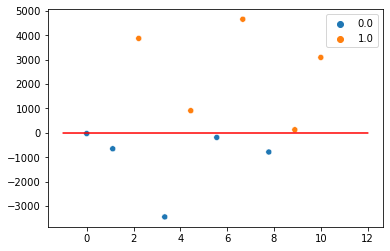

In [26]:
sns.scatterplot(x = np.linspace(0,10,10),y = z, hue = y)
sns.lineplot(x = np.linspace(-1,12,13),y = log_reg_line, color = 'red')

На данном графике хорошо видно разделяющую классы линию, веса подобраны таким образом, что модель на обучающих данных не ошибается

In [27]:
#Полученные вероятности
print(calc_pred_proba(X_st, W))

[3.10061769e-012 5.03504077e-283 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.82063381e-081 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000]


/tmp/ipykernel_206865/3100612240.py:3: RuntimeWarning: overflow encountered in exp
  y_pred_proba = 1 / (1 + np.exp(-z))


## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [28]:
def calc_pred(X, W):
    z = np.dot(X, W)
    y_pred_proba = 1 / (1 + np.exp(-z))
    y_pred = np.around(y_pred_proba,0) #порог отнесения к классу берем 0,5, поэтому для отнесения к классу воспользуемся функкцией округления вероятности до целого
    return y_pred

In [29]:
y_pred = calc_pred(X_st, W)
y_pred

/tmp/ipykernel_206865/1811465241.py:3: RuntimeWarning: overflow encountered in exp
  y_pred_proba = 1 / (1 + np.exp(-z))


array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

## 5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [30]:
y_pred[y_pred==y].shape[0]

10

In [31]:
def accuracy(y, y_pred):
    return y_pred[y_pred==y].shape[0]/y.shape[0]

In [32]:
accuracy(y, y_pred)

1.0

In [33]:
def error_matrix(y, y_pred):
    return np.array([[y_pred[(y_pred==y)&(y==1)].shape[0], y_pred[(y_pred!=y)&(y==0)].shape[0]],[y_pred[(y_pred!=y)&(y==1)].shape[0],y_pred[(y_pred==y)&(y==0)].shape[0]]])

In [34]:
error_matrix(y, y_pred)

array([[5, 0],
       [0, 5]])

In [35]:
def preсision(y, y_pred):
    return y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==0)].shape[0])

In [36]:
preсision(y, y_pred)

1.0

In [37]:
def recall(y, y_pred):
    return y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==1)].shape[0])

In [38]:
recall(y, y_pred)

1.0

In [39]:
def f1(y, y_pred):
    return 2 * y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==0)].shape[0]) * y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==1)].shape[0])/(y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==0)].shape[0]) + y_pred[(y_pred==y)&(y==1)].shape[0]/(y_pred[(y_pred==y)&(y==1)].shape[0]+y_pred[(y_pred!=y)&(y==1)].shape[0])) 

In [40]:
f1(y, y_pred)

1.0

6. Могла ли модель переобучиться? Почему?

В нашей обучающей выборке всего 10 объектов, регуляризация не проводилась, веса при минимальной ошибке имеют большое значение. Тестовой выборки в данной задаче нет. Возможно модель переобучилась на тех данных, которые у нас есть, но верное заключение о переобучении можно сделать лишь получив тестовую выборку и проверив работу модели на тестовых данных. Для тех данных, которые имеются, не имеет смысла проводить регуляризацию и искуственно занижать веса и соответственно упрощать модель. 